## 第一部分
先就已事先處理的'new_winequality'，進行模型的選擇。
選擇出兩個適合的模型進行下一步採樣比較。

In [1]:
import pandas as pd
train_df_dia = pd.read_csv('../newdataset/new_diabetes.csv')
train_df_wine = pd.read_csv('../newdataset/new_winequality.csv')
train_df_wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

## 資料切割

In [2]:
from sklearn.model_selection import train_test_split

# 資料分割 def
def split_data(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
X_train_dia, X_test_dia, y_train_dia, y_test_dia = split_data(train_df_dia, 'diabetes')
X_train_wine, X_test_wine, y_train_wine, y_test_wine = split_data(train_df_wine, 'quality')

## 特徵縮放

In [7]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaler(X_train, X_test):

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler to the training data only
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert the scaled arrays back to DataFrame for better handling in pandas
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled

# 使用範例:
# X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)
X_train_scaled_dia, X_test_scaled_dia = apply_minmax_scaler(X_train_dia, X_test_dia)
X_train_scaled_wine, X_test_scaled_wine = apply_minmax_scaler(X_train_wine, X_test_wine)
print(X_train_scaled_wine.head())

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493       0.362832          0.390411         0.31        0.143836   0.123539   
354       0.132743          0.061644         0.40        0.034247   0.090150   
342       0.557522          0.184932         0.47        0.061644   0.176962   
834       0.371681          0.386986         0.26        0.047945   0.126878   
705       0.336283          0.626712         0.15        0.349315   0.101836   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
493             0.328358              0.265018  0.743759  0.582677   0.226994   
354             0.589552              0.561837  0.082966  0.401575   0.134969   
342             0.074627              0.028269  0.596916  0.440945   0.233129   
834             0.223881              0.060071  0.504405  0.456693   0.061350   
705             0.149254              0.169611  0.655653  0.496063   0.073620   

      alcohol  
493  0.492308  


In [21]:
X_train_scaled_wine.head().to_csv('../newdataset/foruse_wine.csv')

### 模型選擇
Logistic Regression
Random Forest
SVM
KNN
Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
def display_confusion_matrix(y_true, y_pred):

    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Assuming binary classification for simplicity; adjust if needed for multi-class
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Negative:0', 'Actual Positive:1'], 
                         columns=['Predicted Negative:0', 'Predicted Positive:1'])

    # Extracting TN, FP, FN, TP
    # TN, FP, FN, TP = cm.ravel()
    # print(f"True Negatives (TN): {TN}")
    # print(f"False Positives (FP): {FP}")
    # print(f"False Negatives (FN): {FN}")
    # print(f"True Positives (TP): {TP}")

    return cm_df

In [10]:
def train_evaluate_lr(X_train, X_test, y_train, y_test, model_name = 'logistic regression'):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)
    
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print("ROC_AUC:", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'LR (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, model_name = 'Random Forest'):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    print("ROC_AUC:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'RF (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
def train_evaluate_svm(X_train, X_test, y_train, y_test, model_name = 'SVM'):
    # 初始化SVM模型  
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)  # 训练模型
    predictions = svm_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'SVM (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
def train_evaluate_nb(X_train, X_test, y_train, y_test, model_name = 'NB'):
    # 模型訓練
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    predictions = nb_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = nb_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'NB (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('NB ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def train_evaluate_knn (X_train, X_test, y_train, y_test, model_name='KNN'):
    # 創建 KNN 模型，選擇鄰居數量
    knn_model = KNeighborsClassifier()
    # 訓練模型
    knn_model.fit(X_train, y_train)
    # 預測
    predictions = knn_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = knn_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'KNN (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

lr:
Accuracy: 0.959
F1 Score: 0.9556375350869039
Precision: 0.87248322147651
Recall: 0.6088992974238876
G-mean: 0.7770711430096634
MCC: 0.7089946209618064
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18140                   152
Actual Positive:1                   668                  1040
ROC_AUC: 0.961246175751061


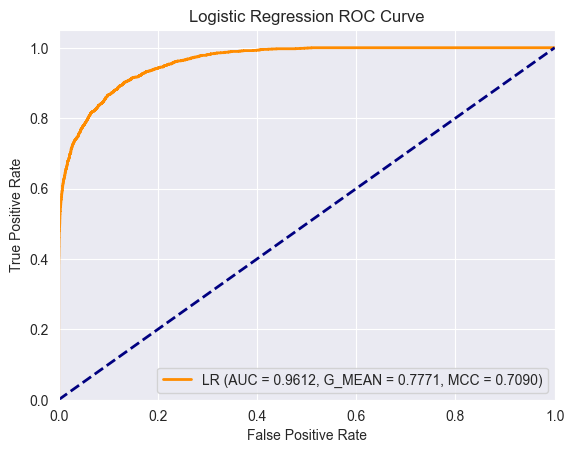

rf:
Accuracy: 0.96985
F1 Score: 0.96770774618471
Precision: 0.9416466826538769
Recall: 0.689695550351288
G-mean: 0.8288203077569357
MCC: 0.7913962141331919
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18219                    73
Actual Positive:1                   530                  1178
ROC_AUC: 0.962623215841276


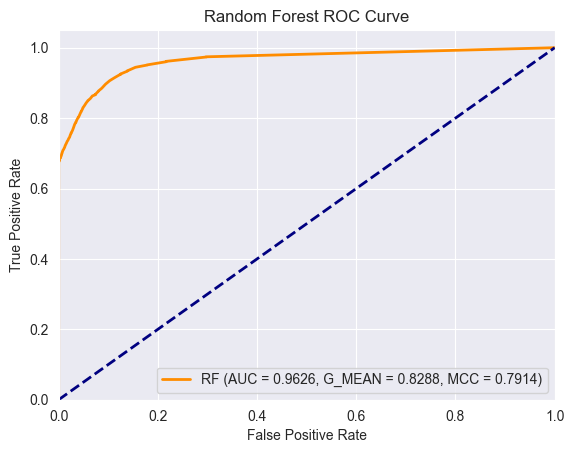

svm:
Accuracy: 0.95915
F1 Score: 0.95462926676374
Precision: 0.9246901811248809
Recall: 0.5679156908665105
G-mean: 0.7519727127591112
MCC: 0.7065441204637751
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18213                    79
Actual Positive:1                   738                   970
ROC_AUC: 0.9592206489214005


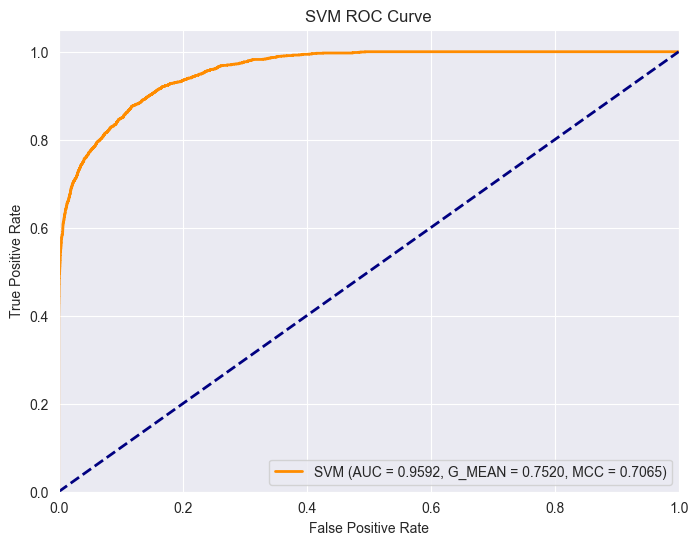

nb:
Accuracy: 0.91505
F1 Score: 0.8749053234797936
Precision: 1.0
Recall: 0.005269320843091335
G-mean: 0.07259008777437409
MCC: 0.06943695351772393
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     18292
           1       1.00      0.01      0.01      1708

    accuracy                           0.92     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.92      0.87     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18292                     0
Actual Positive:1                  1699                     9
ROC_AUC: 0.7924263579220462


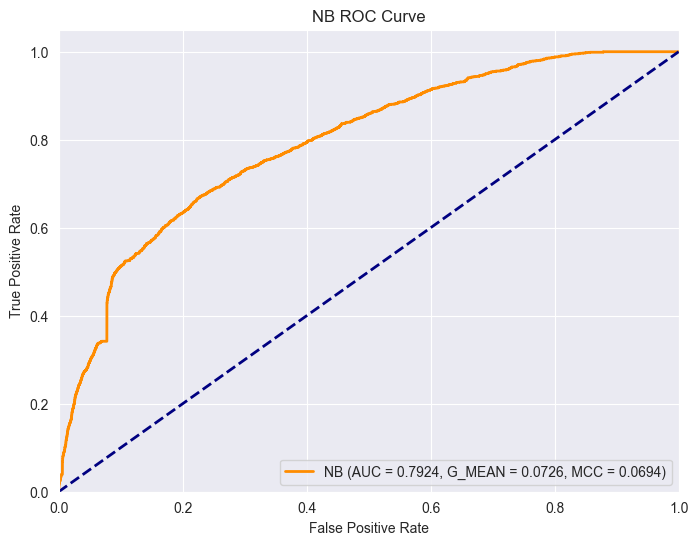

KNN:
Accuracy: 0.96095
F1 Score: 0.9574541608920583
Precision: 0.9019947961838681
Recall: 0.6088992974238876
G-mean: 0.7779060245732762
MCC: 0.7226959360058215
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 18179                   113
Actual Positive:1                   668                  1040
ROC_AUC: 0.9054597363047846


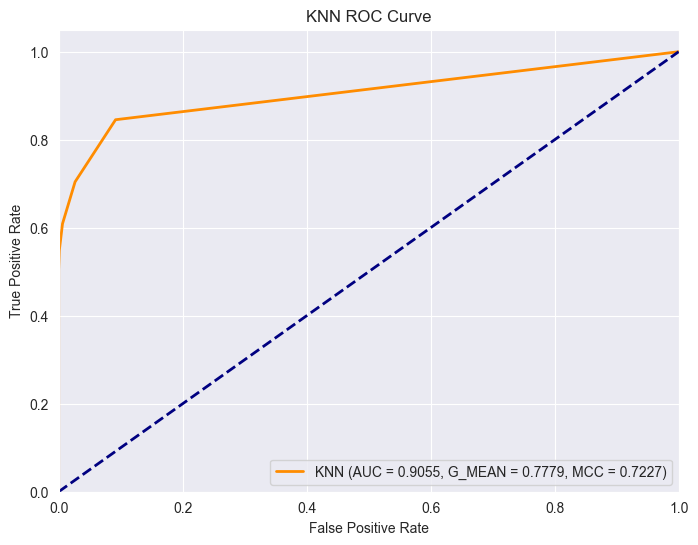

In [57]:
# 輸出
train_lr = train_evaluate_lr(X_train_scaled_dia, X_test_scaled_dia, y_train_dia, y_test_dia, model_name='lr')
train_rf = train_evaluate_rf(X_train_scaled_dia, X_test_scaled_dia, y_train_dia, y_test_dia, model_name='rf')
train_svm = train_evaluate_svm(X_train_scaled_dia, X_test_scaled_dia, y_train_dia, y_test_dia, model_name='svm')
train_nb = train_evaluate_nb(X_train_scaled_dia, X_test_scaled_dia, y_train_dia, y_test_dia, model_name='nb')
train_knn = train_evaluate_knn(X_train_scaled_dia, X_test_scaled_dia, y_train_dia, y_test_dia, model_name='KNN')

lr:
Accuracy: 0.965625
F1 Score: 0.9487380763116058
Precision: 0.965625
Recall: 1.0
G-mean: 0.0
MCC: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.98      0.50      0.49       320
weighted avg       0.97      0.97      0.95       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                     0                    11
Actual Positive:1                     0                   309
ROC_AUC: 0.9252721388643719


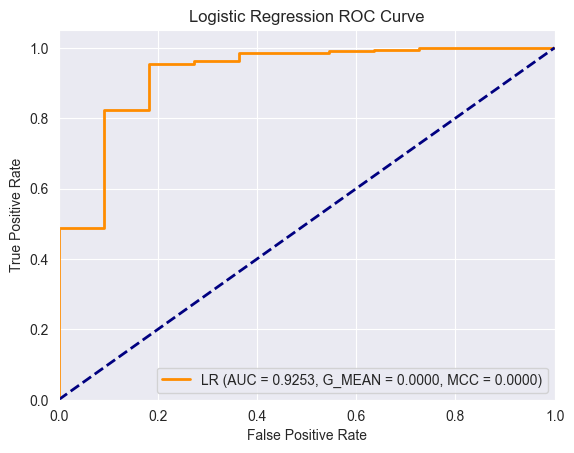

rf:
Accuracy: 0.96875
F1 Score: 0.9559779723991507
Precision: 0.9686520376175548
Recall: 1.0
G-mean: 0.30151134457776363
MCC: 0.29674783259031634
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.98      0.55      0.58       320
weighted avg       0.97      0.97      0.96       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                     1                    10
Actual Positive:1                     0                   309
ROC_AUC: 0.8742277140335393


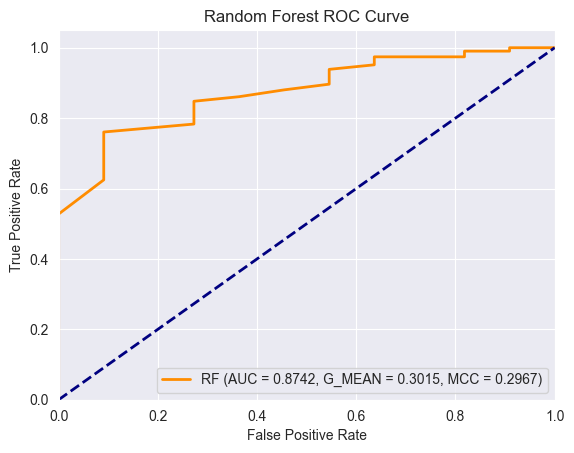

svm:
Accuracy: 0.965625
F1 Score: 0.9487380763116058
Precision: 0.965625
Recall: 1.0
G-mean: 0.0
MCC: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.98      0.50      0.49       320
weighted avg       0.97      0.97      0.95       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                     0                    11
Actual Positive:1                     0                   309
ROC_AUC: 0.23300970873786409


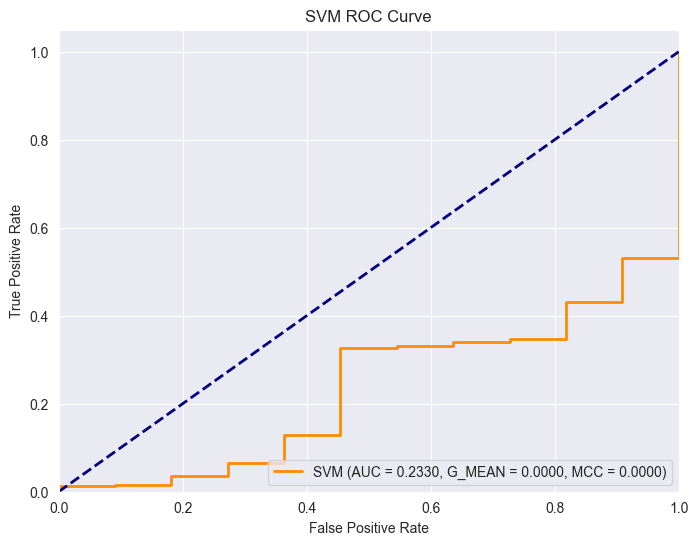

KNN:
Accuracy: 0.965625
F1 Score: 0.9487380763116058
Precision: 0.965625
Recall: 1.0
G-mean: 0.0
MCC: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.97       320
   macro avg       0.98      0.50      0.49       320
weighted avg       0.97      0.97      0.95       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                     0                    11
Actual Positive:1                     0                   309
ROC_AUC: 0.6753456899087967


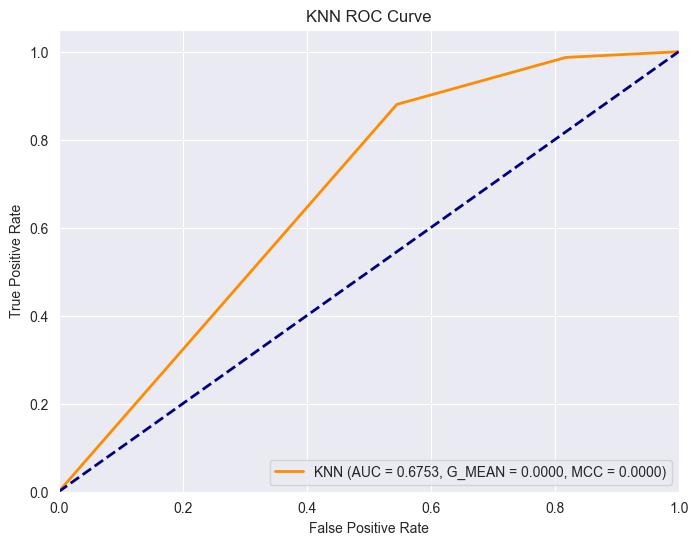

In [15]:
# 輸出
train_lr_wine = train_evaluate_lr(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine, model_name='lr')
train_rf_wine = train_evaluate_rf(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine, model_name='rf')
train_svm_wine = train_evaluate_svm(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine, model_name='svm')
train_knn_wine = train_evaluate_knn(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine, model_name='KNN')

/var/folders/3n/x4vvwtxs2tb2m33xwzldz5pm0000gn/T/ipykernel_3950/3021926621.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='black')  # 添加对角线


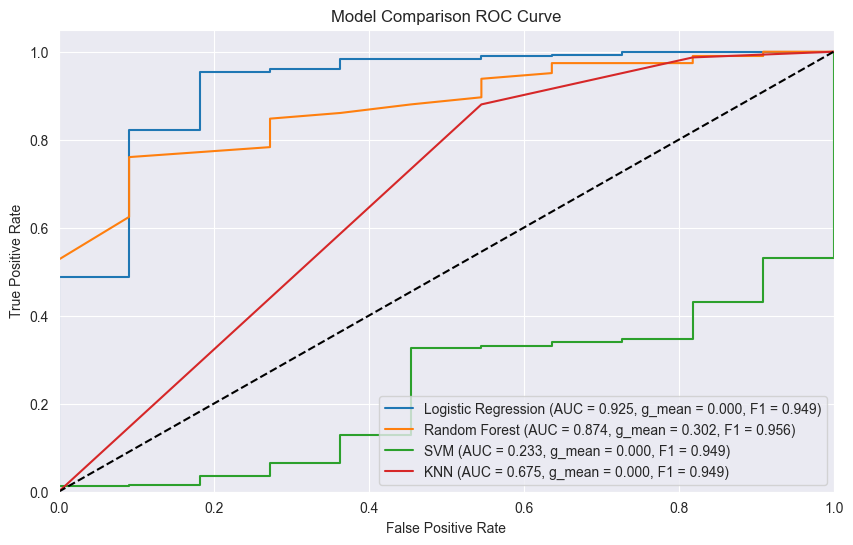

In [20]:
# 引入所需的库
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curves(X_train, y_train, X_test, y_test):
    # 初始化模型
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(kernel='linear', probability=True, random_state=42),
        "KNN": KNeighborsClassifier()
    }

    # 初始化图表
    plt.figure(figsize=(10, 6))

    # 对每个模型进行训练和评估
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # 取得正类的预测概率
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        recall = recall_score(y_test, y_preds, zero_division=1)
        cm = confusion_matrix(y_test, y_preds)
        
        # 計算G-mean
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)
        g_mean = np.sqrt(recall * specificity)
        f1 = f1_score(y_test, y_preds, average='weighted')

        # 绘制ROC曲线
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f}, g_mean = {g_mean:.3f}, F1 = {f1:.3f})')

    # 添加图表装饰
    plt.plot([0, 1], [0, 1], 'k--', color='black')  # 添加对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# 确保 X_train, y_train, X_test, y_test 已被定义和分配
# 调用函数绘制ROC曲线
plot_roc_curves(X_train_scaled_wine, y_train_wine, X_test_scaled_wine, y_test_wine)


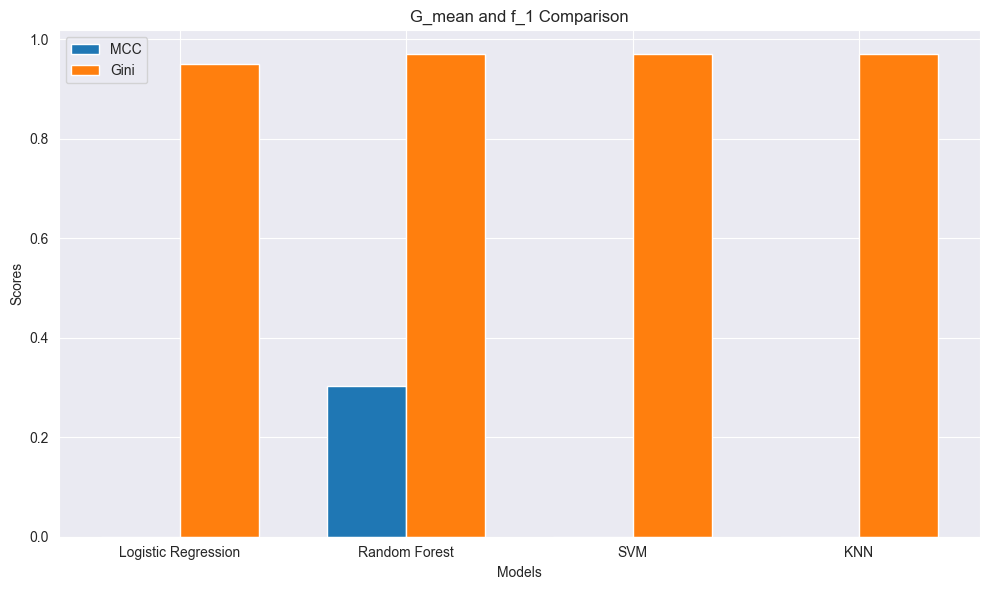

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的模型名称和评估指标
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
roc_aucs = [0.925, 0.874, 0.233, 0.675]  # 示例 ROC-AUC 值
G_mean = [0.0, 0.302, 0.0, 0.0]
f_1 = [0.949, 0.969, 0.969, 0.969]

# 绘制 ROC 曲线的函数
def plot_roc_curves(fprs, tprs, labels, roc_aucs):
    plt.figure(figsize=(10, 6))
    for fpr, tpr, label, roc_auc in zip(fprs, tprs, labels, roc_aucs):
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Integrated ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# 比较 MCC 和 Gini 系数的函数
def compare_metrics(models, G_mean, f_1):
    ind = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, G_mean, width, label='MCC')
    rects2 = ax.bar(ind + width/2, f_1, width, label='Gini')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('G_mean and f_1 Comparison')
    ax.set_xticks(ind)
    ax.set_xticklabels(models)
    ax.legend()

    fig.tight_layout()
    plt.show()

# 调用绘图函数
# 注意：您需要替换 fprs 和 tprs 为您的模型数据
# plot_roc_curves(fprs, tprs, models, roc_aucs)
compare_metrics(models, G_mean, f_1)


### **五種模型統計**
**Diabetes選擇Logistic regression & Random Forest**

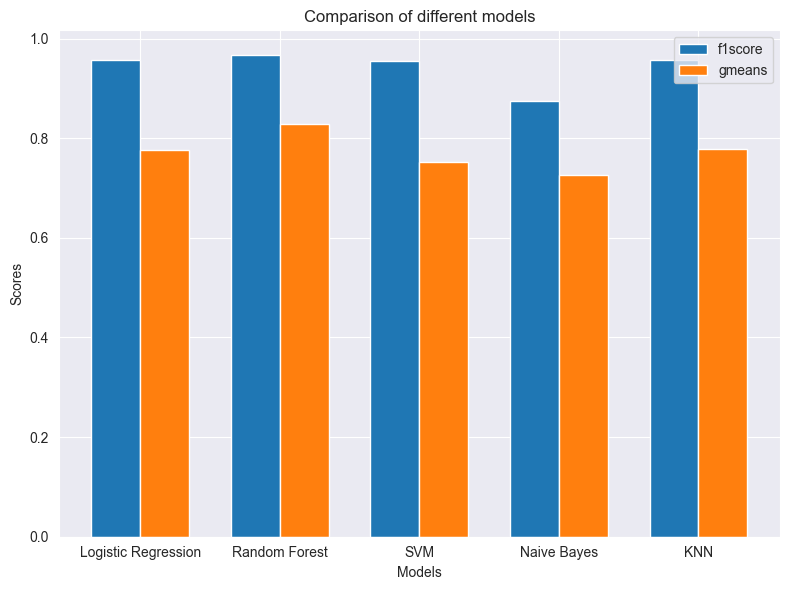

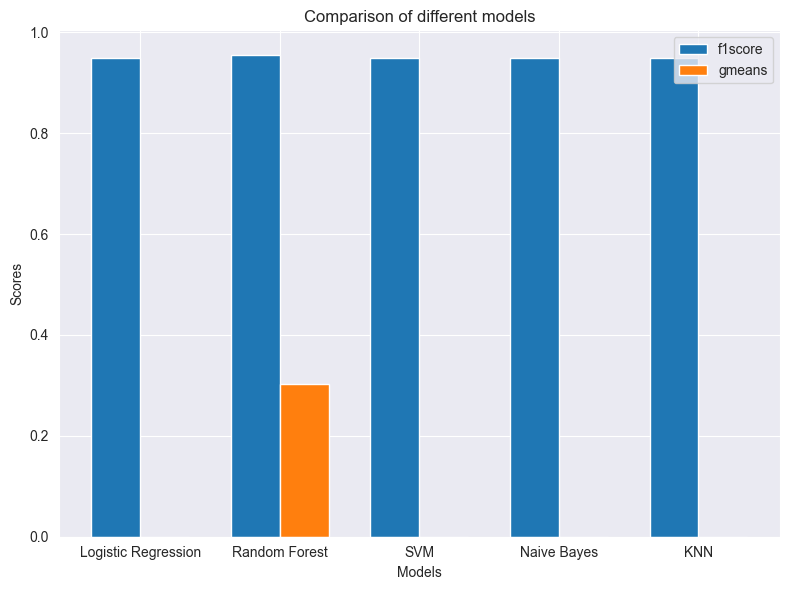

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的模型名称和评估指标
dia_models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN',]
dia_f1score = [0.956, 0.968, 0.955, 0.875, 0.957]
dia_roc_aucs = [0.961, 0.963, 0.959, 0.792, 0.905]  # 示例 ROC-AUC 值
dia_gmeans = [0.777, 0.829, 0.752, 0.726, 0.778]  # 示例 Gini 系数
dia_mccs = [0.709, 0.791, 0.707, 0.069, 0.723]  # 示例 MCC 值

wine_models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN',]
wine_f1score = [0.949, 0.956, 0.949, 0.949, 0.949]
wine_roc_aucs = [0.925, 0.874, 0.233, 0.896, 0.675]  # 示例 ROC-AUC 值
wine_gmeans = [0.0, 0.302, 0.0, 0.0, 0.0]  # 示例 Gini 系数
wine_mccs = [0.0, 0.0, 0.0, 0.0, 0.0]  # 示例 MCC 值

# 比较 MCC 和 Gini 系数的函数
def compare_metrics(models, f1score, gmeans):
    ind = np.arange(len(models))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(ind - width/2, f1score, width, label='f1score')
    rects2 = ax.bar(ind + width/2, gmeans, width, label='gmeans')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of different models')
    ax.set_xticks(ind)
    ax.set_xticklabels(models)
    ax.legend()

    fig.tight_layout()
    plt.show()

# 调用绘图函数
# 注意：您需要替换 fprs 和 tprs 为您的模型数据
# plot_roc_curves(fprs, tprs, models, roc_aucs)
compare_metrics(dia_models, dia_f1score, dia_gmeans)
compare_metrics(wine_models, wine_f1score, wine_gmeans)

### Grid SearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

# # 創建 Logistic Regression 模型
# lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
# 
# # 定義參數網格
# lr_param_grid = {
#     'C': [0.1, 1, 10, 100],  # 正則化強度的倒數
#     'penalty': ['l1', 'l2']  # 使用的懲罰
# }
# 
# # 設定 GridSearchCV
# grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='f1', verbose=2)
# 
# # 訓練模型
# grid_search.fit(X_train_scaled, y_train)
# 
# # 輸出最佳參數和最佳分數
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳模型進行預測
# y_pred = grid_search.predict(X_test_scaled)
# 
# # 評估最終模型
# print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
# # 創建模型
# rf_model = RandomForestClassifier()
# 
# # 定義參數網格
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# 
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2)
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
# # 創建模型
# nb_model = MultinomialNB()
# 
# # 定義參數網格
# param_grid = {
#     'alpha': [0.01, 0.1, 1.0, 10.0],  # 不同的平滑參數
#     'fit_prior': [True, False]  # 是否學習先驗概率
# }
# 
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
# knn_model = KNeighborsClassifier()
# # 定義參數網格
# knn_param_grid = {
#     'n_neighbors': np.arange(1, 31), # 鄰居數量
#     'weights': ['uniform', 'distance'], # 權重類型
#     'metric': ['euclidean', 'manhattan'] # 距離度量
# }
# # 使用網格搜索調整參數
# grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_scaled, y_train)
# 
# # 最佳參數和模型
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 
# # 使用最佳參數的模型進行預測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)
# print(classification_report(y_test, y_pred, zero_division=0))